In [1]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, Dropout
from keras import backend as K
from keras.models import Sequential

/Users/manojkumar/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
print K.image_data_format()

channels_last


In [4]:
#initialising some commonly used variables according to fashion-mnist data images
img_rows = 28
img_cols=28
epochs = 24
batch_size= 128
number_of_classes =10

In [5]:
#adjust the input shape of x_train and x_test
print x_train.shape
print x_train.shape[0]
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)
print x_train.shape,x_test.shape

(60000, 28, 28)
60000
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [6]:
# nType convert and scale test and training data
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [7]:
#convert class vectors to binary class matrices
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print y_train.shape,y_test.shape

(60000, 10) (10000, 10)


In [17]:
#define the model
model = Sequential()
print input_shape
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape)) #input_shape of 1 image
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))  #to avoid overfitting
model.add(Dense(10,activation='softmax'))
print model.summary()

(28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0        

In [18]:
#compile and train
from keras.optimizers import Adadelta
model.compile(optimizer=Adadelta(),loss='categorical_crossentropy',metrics=['accuracy'])
print model.summary()
print x_test.shape, y_test.shape
hist = model.fit(x_test,y_test,batch_size=batch_size,epochs=24,verbose=1,validation_data=(x_test,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [19]:
score = model.evaluate(x_test,y_test,verbose=1)
print 'Loss on test data: ' ,score[0], 'Accuracy on test data: ' ,score[1]

10000/10000 [==============================] - 3s 336us/step
Loss on test data:  0.2436974578678608 Accuracy on test data:  0.9058


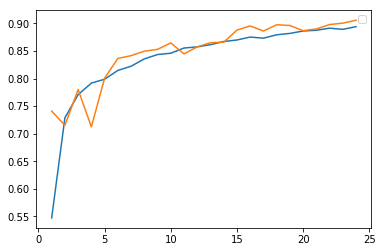

In [20]:
import matplotlib.pyplot as plt
epoch_list = list(range(1,len(hist.history['acc'])+1))
plt.plot(epoch_list,hist.history['acc'],epoch_list,hist.history['val_acc'])
plt.legend('Training accuracy','Validation accuracy')